# *Online Retail Customers Analysis*

<p style='font-size:18px;'><i>We will improve understanding online retail customers using  KMeans clustering to classify them. Leveraging powerful libraries like sklearn and pandas, we'll walk through the process of analyzing customer data to uncover meaningful patterns and segments. We will visualize the clustering results to gain insights into customer behavior and interpret the outcomes to drive improvement in customer experience.
 </i></p>

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the online retail customers data using pandas dataframe
df = pd.read_excel('online_retail_II.xlsx', sheet_name=0 )

## *Exploratory Data Analysis*

In [3]:
# Preview the first five rows of the dataframe
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# Display statistical summary of numerical columns
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
# Display satistical summary of categorical/object columns
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
# Display first 10 rows where Customer ID is null
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [8]:
# Display the rows where Quantity is a negative value
df[df['Quantity']<0].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
17270,C490746,22138,BAKING SET 9 PIECE RETROSPOT,-6,2009-12-07 18:09:00,4.95,14013.0,United Kingdom
200414,C508639,85099B,JUMBO BAG RED RETROSPOT,-3,2010-05-17 15:13:00,1.65,14655.0,United Kingdom
106660,499615,20773,NaN,-26,2010-03-01 12:40:00,0.00,NaN,United Kingdom
515878,C537402,22196,SMALL HEART MEASURING SPOONS,-12,2010-12-06 14:43:00,0.85,15502.0,United Kingdom
47883,C493852,21257,VICTORIAN SEWING BOX MEDIUM,-1,2010-01-07 15:50:00,6.60,14156.0,EIRE
315823,C520089,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,2010-08-24 11:07:00,7.95,14156.0,EIRE
119272,C500774,22070,SMALL RETRO SPOT MUG IN BOX RED,-6,2010-03-10 10:42:00,3.75,16946.0,United Kingdom
413859,528943,21016,NaN,-216,2010-10-25 15:30:00,0.00,NaN,United Kingdom
308377,C519491,84664,CHERRY BLOSSOM BATHROOM CABINET,-1,2010-08-17 13:56:00,4.95,17850.0,United Kingdom
209794,C509620,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-2,2010-05-25 09:50:00,5.95,13004.0,United Kingdom


In [9]:
# Convert 'Invoice' to type 'string' to perform string operations
df['Invoice'] = df['Invoice'].astype('str')
# Display those rows where 'Invoice' is NOT exactly 6 digits
df[df['Invoice'].str.match("^\\d{6}$")== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [10]:
# Extract unique invoice identifiers after removing all digits (0-9) from the 'Invoice' column
# This uses regex to replace any digit with an empty string, then finds all unique values
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
# Display rows where 'Invoice' starts with 'A'
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [12]:
# Convert 'StockCode' to type 'String'
df['StockCode'] = df['StockCode'].astype(str)
# List of stock codes that do NOT follow the conventional 5 digit pattern
df[(df['StockCode'].str.match("^\\d{5}$")== False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")== False)]['StockCode'].unique() 

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [13]:
# After analyzing all values, out of all of them only this one seems legit and we will keep it
df[df['StockCode'].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


## *Data Cleaning*

In [14]:
# Make a copy of the original dataframe
cleaned_df = df.copy()

In [15]:
# Convert Invoice column to string type
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype(str)
# Create a mask to filter invoices that are exactly 6 digits
mask =(cleaned_df['Invoice'].str.match("^\\d{6}$") == True)
# Apply the mask to keep only rows with 6-digit invoice numbers
cleaned_df = cleaned_df[mask]

In [16]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [17]:
# Convert StockCode column to String type
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype(str)
# Create a mask to filter stock codes that are either:
# 1. Exactly 5 digits
# 2. 5 digits followed by letters 
# 3. Exactly the value 'PADS'
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)
# Apply the mask to keep only rows that match our criteria
cleaned_df = cleaned_df[mask]

In [18]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [19]:
# Remove rows where 'Customer ID' is missing
cleaned_df.dropna(subset = ['Customer ID'], inplace = True )

C:\Users\HaqNa\AppData\Local\Temp\ipykernel_7256\1558054390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset = ['Customer ID'], inplace = True )


In [20]:
# Display statistical summary of the cleaned dataframe
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [21]:
# Display the number of rows where 'Price' is zero
len(cleaned_df[cleaned_df['Price']== 0])

28

In [22]:
# Filter out rows to include only those where 'Price' is NOT less than or equal to zero
cleaned_df = cleaned_df[cleaned_df['Price'] > 0.0]

In [23]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


### *Percentage of Data remaining after Cleaning*

In [24]:
# Calculate the ratio of cleaned data to original data.
len(cleaned_df)/len(df)

0.7732429238325965

<ul style='font-size:16px;'><i><li>77 % data remain after cleaning</li><li> 23 % records dropped after cleaning </li></i></ul>

## *Feature Engineering*

In [25]:
# Calculate the total sales amount by multiplying quantity by price for each row
cleaned_df["SalesLineTotal"] = cleaned_df['Quantity'] * cleaned_df['Price']

C:\Users\HaqNa\AppData\Local\Temp\ipykernel_7256\1594868112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df['Quantity'] * cleaned_df['Price']


In [26]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [69]:
# Group the cleaned dataframe by Customer ID and calculate key metrics
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False) \
.agg(
    MonetaryValue = ("SalesLineTotal", "sum"), # Total amount spent by each customer
    Frequency = ("Invoice", "nunique"),        # Number of unique invoices (transactions) per customer
    LastInvoiceDate = ('InvoiceDate', "max")   # Most recent purchase date for each customer
    
)

In [71]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [72]:
# Get the most recent invoice date from the dataset
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

# Calculate 'Recency' as the number of days between the most recent invoice date and each customer's last purchase
# This is a common RFM (Recency, Frequency, Monetary) analysis metric
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [73]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


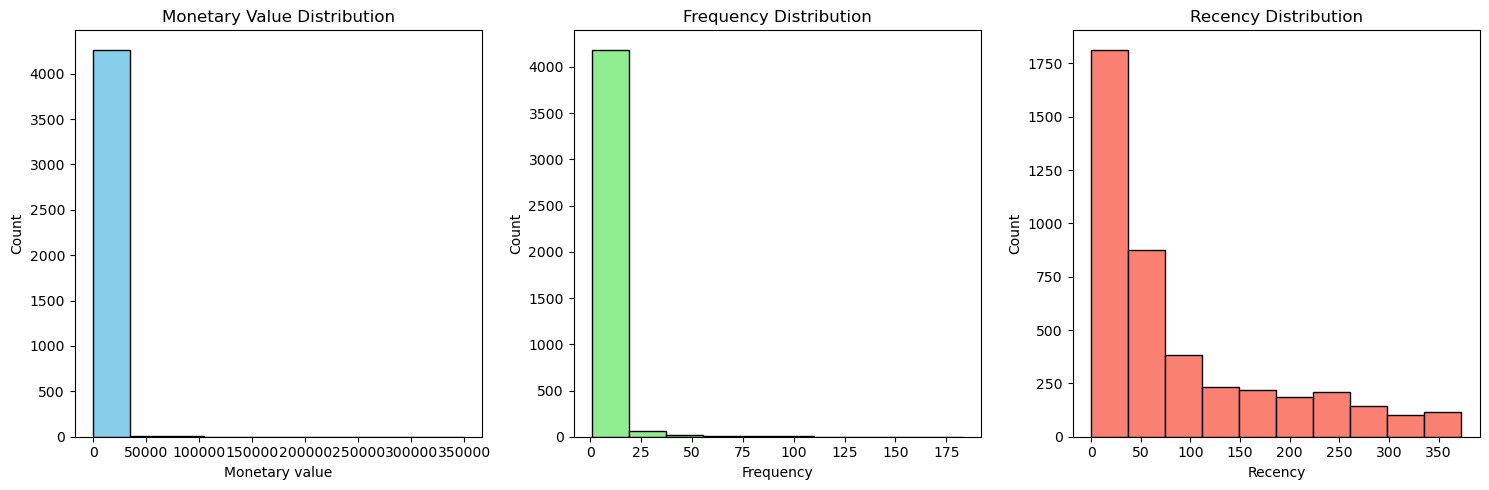

In [30]:
# Create a figure with specified size
plt.figure(figsize=(15,5))

# Create first subplot for Monetary Value
plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary value')
plt.ylabel('Count')

# create second subplot for Frequency
plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

# create third subplot for Recency
plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Display figure with all three histograms
plt.show()

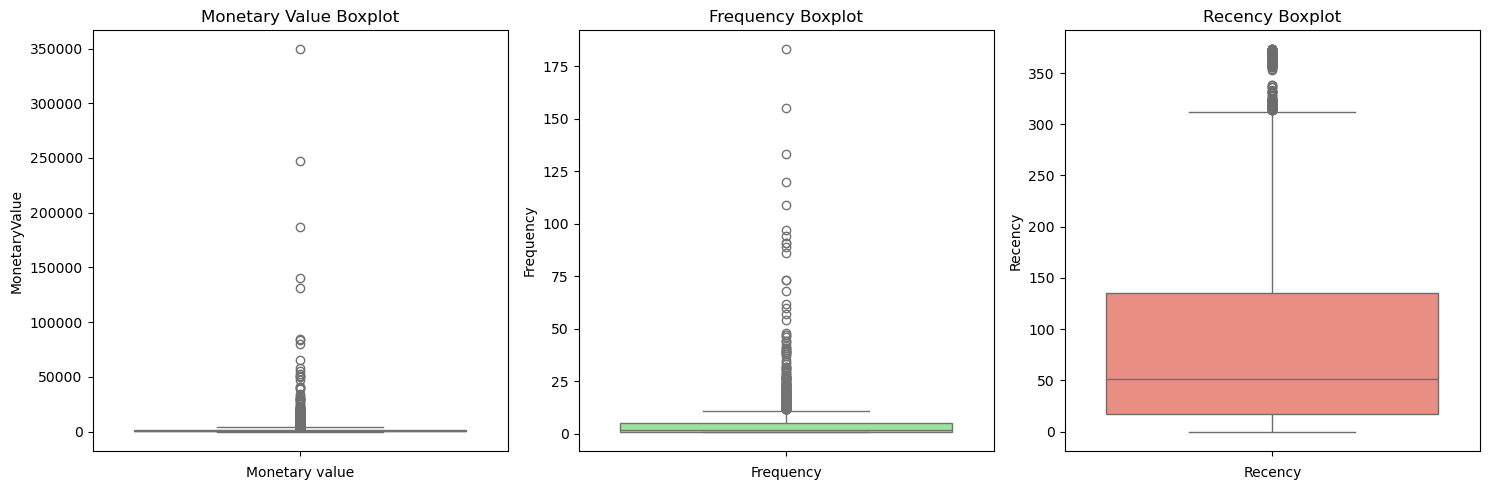

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary value')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [32]:
# Calculate the first quartike (25th percentile) of MonetaryValue
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
# Calulate the third quartile (75th quartile) of MonetaryValue
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
# Calculate the InterQuartile Range (IQR) for MonetaryValue
M_IQR = M_Q3 - M_Q1

# Create a new dataframe containing only the outlier records
monetary_ouliers_df = aggregated_df[(aggregated_df['MonetaryValue']>(M_Q3 + 1.5 * M_IQR)) | (aggregated_df['MonetaryValue']< (M_Q1 - 1.5 * M_IQR))].copy()

In [33]:
# Display statistical summary of MonetaryValue outliers dataframe
monetary_ouliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [34]:
# Calculate the first quartile (25th percentile) of Frequency 
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
# Calculate the third quartile (75th percentile) of Frequency
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
# Calculate the IQR for Frequency
F_IQR = F_Q3 - F_Q1

# Create a new dataframe containing only the outlier rows
frequency_ouliers_df = aggregated_df[(aggregated_df['Frequency']>(F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency']< (F_Q1 - 1.5 * F_IQR))].copy()

In [35]:
# Display statistical summary of Frequency outliers dataframe
frequency_ouliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [36]:
# Filter the aggregated dataframe to keep only non-outlier customers by removing customers that are either monetary outliers or frequency outliers
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_ouliers_df.index)) & (~aggregated_df.index.isin(frequency_ouliers_df.index))]

In [37]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


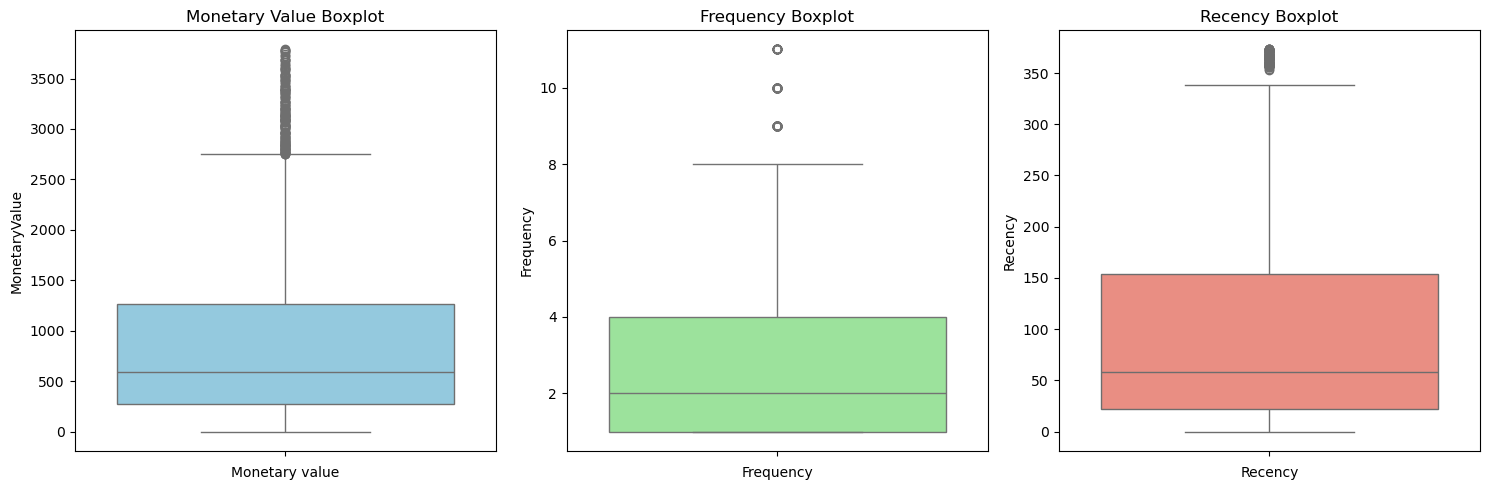

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary value')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

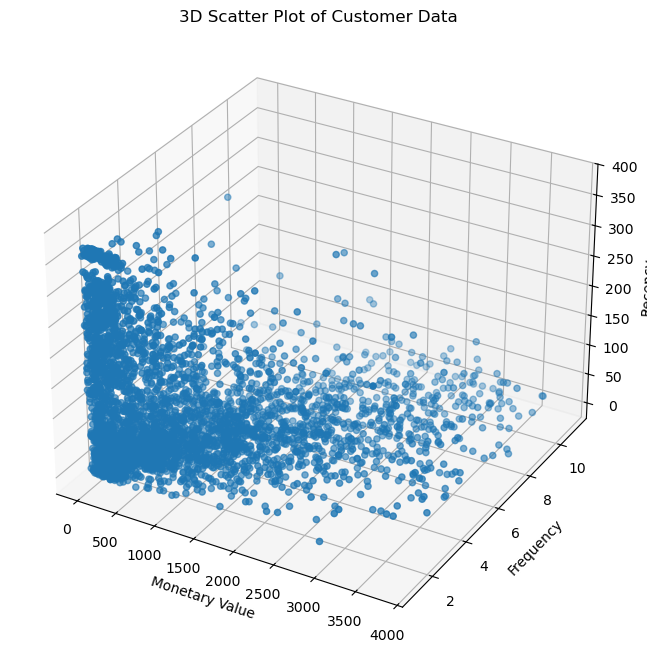

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

In [40]:
# since our features are on different scales, so we will apply standard scaling on the features ensuring that each feature contributes equally to the 
# analysis. Standard scaling assumes our data is normally distributed/balanced.

In [41]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()
# Fit and transform the dataframe using the scaler instance
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

In [42]:
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [43]:
# Create a DataFrame from the scaled data, preserving the original index from non_outliers_df
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index , columns=('MonetaryValue', 'Frequency', 'Recency'))

In [44]:
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


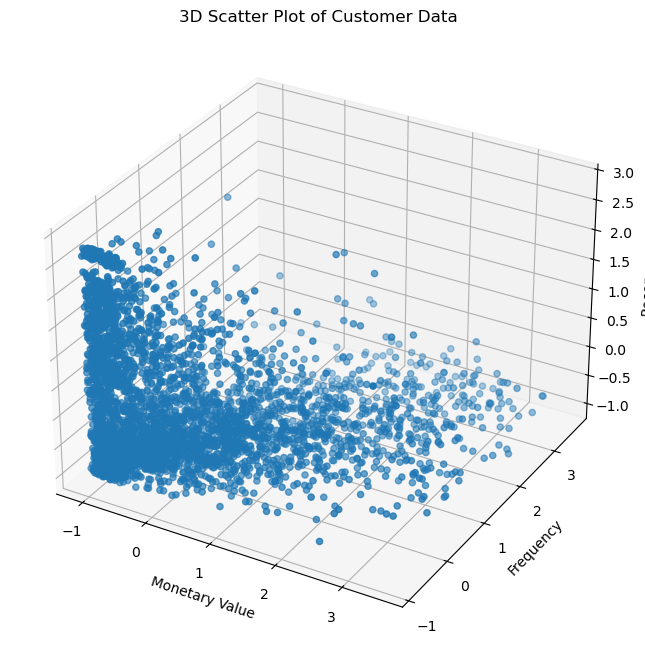

In [45]:
# 3D plot of the scaled data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

## *KMeans Clustering*

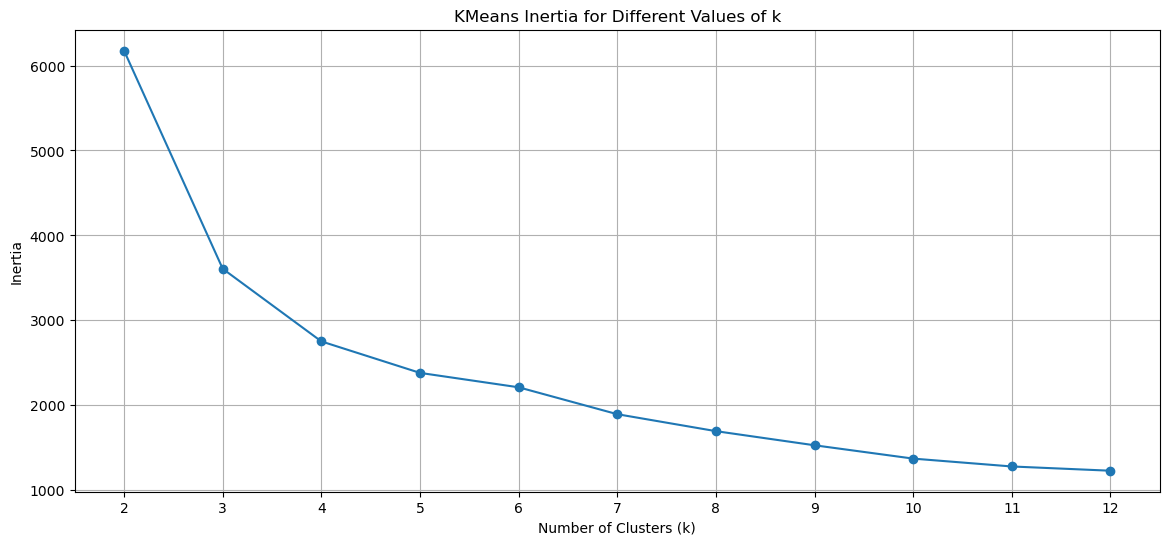

In [46]:
# Elbow method to determine the number of k i.e number of clusters
max_k = 12
inertia = [] # Inertia is the average distance between the cluster center (centroid) and the data points within the cluster
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [47]:
# Another metric to use is the silhouette score which basically gives the overlapping between clusters
# A higher value indicates more distinct clusters (minimum overlapping) and vice versa
# Range [-1,1]; A perfect 1 means no overlapping

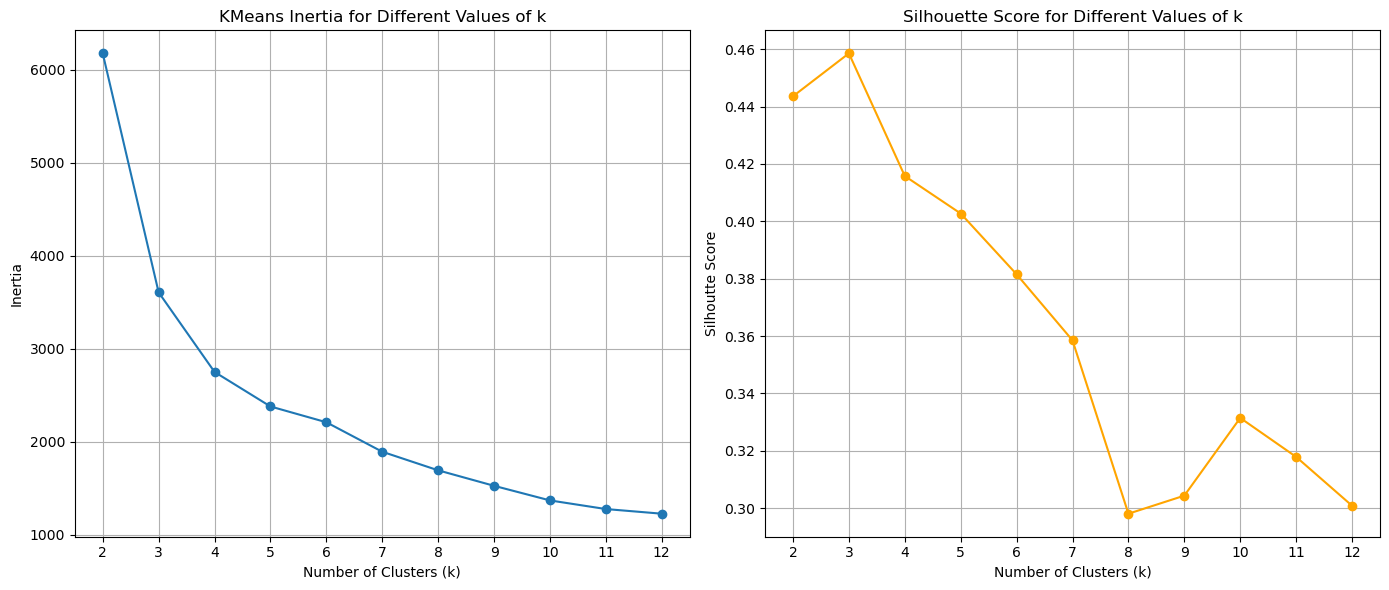

In [48]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoutte Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


In [74]:
# Cluster number 4 has a slight better silhouette score than the fifth cluster; it will have less potential overlapping.

In [50]:
# Initialize the KMeans Clustering algorithm with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
# Fit the model to the scaled data and predict cluster labels for each data point
cluster_labels = kmeans.fit_predict(scaled_data_df)

In [51]:
cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [52]:
# Add the cluster labels to our original dataframe in a new column 'Cluster'
non_outliers_df['Cluster'] = cluster_labels

C:\Users\HaqNa\AppData\Local\Temp\ipykernel_7256\2444062509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


In [53]:
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


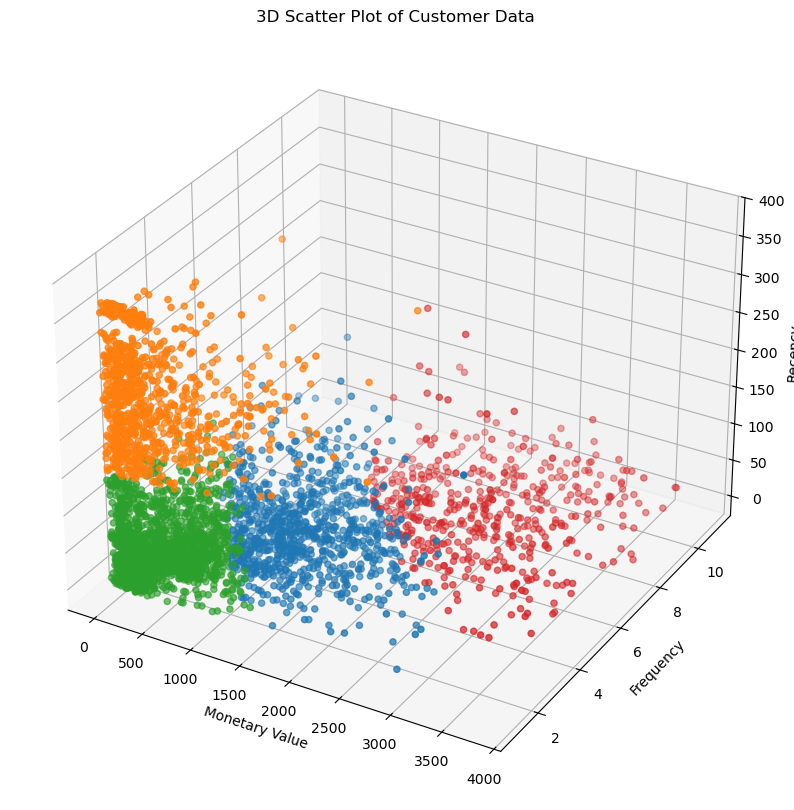

In [54]:
# Mapping colors to each cluster
cluster_colors = {0:'#1f77b4', # Blue
                  1:'#ff7f0e', # Orange
                  2:'#2ca02c', # Green
                  3:'#d62728'} #Red

# Assign colors to each data point based on its cluster assignment
colors = non_outliers_df['Cluster'].map(cluster_colors)

# Create a 3D scatterplot with RFM values and cluster-based colors
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(non_outliers_df['MonetaryValue'], # x-axis
                     non_outliers_df['Frequency'],     # y-axis
                     non_outliers_df['Recency'],       # z-axis
                     c=colors,                         # use mapped colors
                     marker='o'                        # Use circle markers
                    )

# label the axes
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
# Add a title
ax.set_title('3D Scatter Plot of Customer Data')
# Display the plot
plt.show()

In [55]:
# Violin plots to interpret the individual clusters by each feature

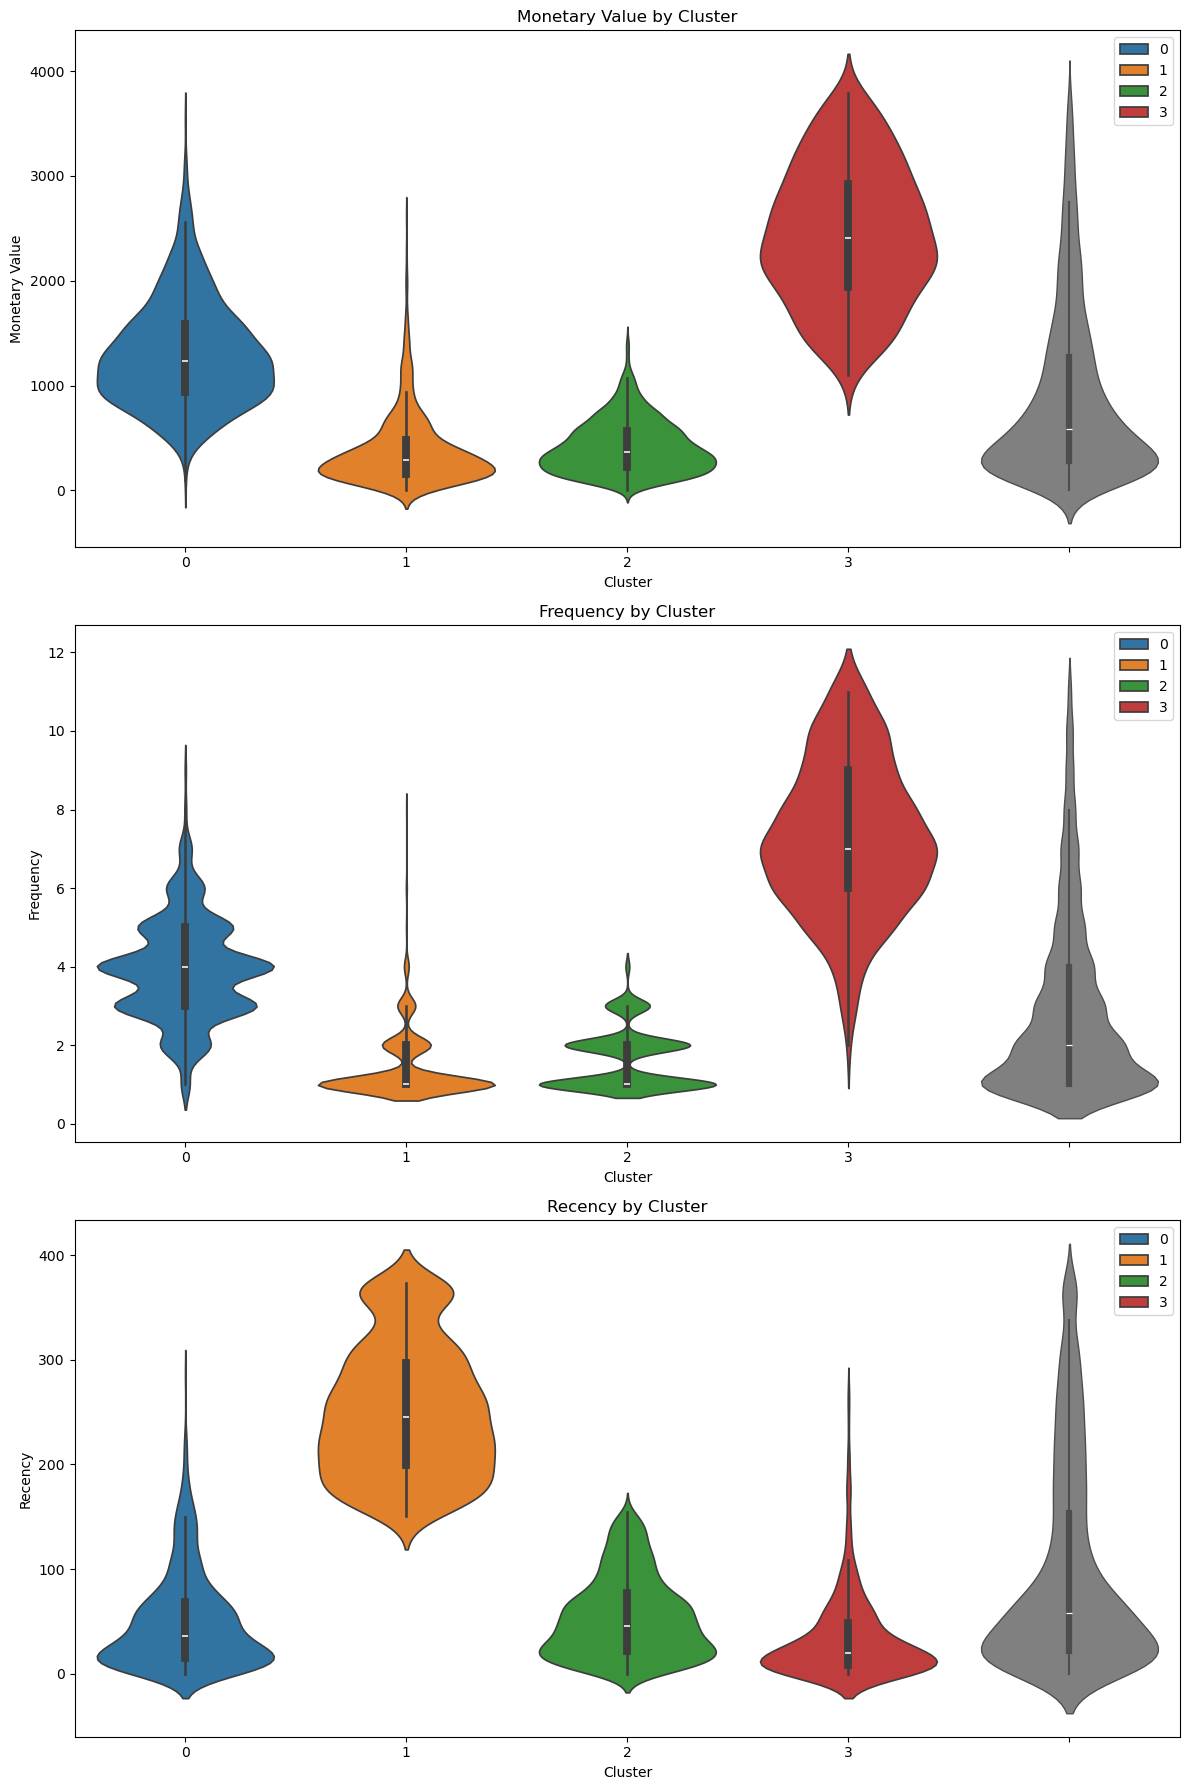

In [56]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue = non_outliers_df['Cluster'] )
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

<p style='font-size:18px;'> <i>1. Cluster 0 (Blue): "Retain"</i></p>
<ul style='font-size:18px;'><i>
<li>Rationale: This cluster represents high-value customers who purchase rehularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.</li>
<li>Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active</li></i></ul>

<p style='font-size:18px;'><i> 2. Cluster 1 (Orange): "Re-Engage"</i></p>
<ul style='font-size:18px;'><i>
<li>Rationale: This group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behaviour.</li>
<li>Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.</li></i></ul>

<p style='font-size:18px;'><i> 2. Cluster 2 (Green): "Nurture"</i></p>
<ul style='font-size:18px;'><i>
<li>Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.</li>
<li>Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.</li></i></ul>

<p style='font-size:18px;'><i> 2. Cluster 3 (Red): "Reward"</i></p>
<ul style='font-size:18px;'><i>
<li>Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.</li>
<li>Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keeep them engaged and satisfied.</li></i></ul>


In [57]:
# Dealing with outliers

In [58]:
# Find indices that are outliers in both monetary and frequency dataframes
overlap_indices = monetary_ouliers_df.index.intersection(frequency_ouliers_df.index)

# Create a dataframe with only monetary outliers (excluding those that are also frequency outliers)
monetary_only_outliers = monetary_ouliers_df.drop(overlap_indices)

# Create a dataframe with only frequency outliers (excluding those that are also monetary outliers)
frequency_only_outliers = frequency_ouliers_df.drop(overlap_indices)

# Create a dataframe with customers who are outliers in both monetary and frequency dimensions
monetary_And_frequency_outliers = monetary_ouliers_df.loc[overlap_indices]

In [59]:
# Manually assign cluster labels to each outlier group
monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_And_frequency_outliers['Cluster'] = -3

In [60]:
# Combine all clusters in a single dataframe
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_And_frequency_outliers])

In [61]:
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


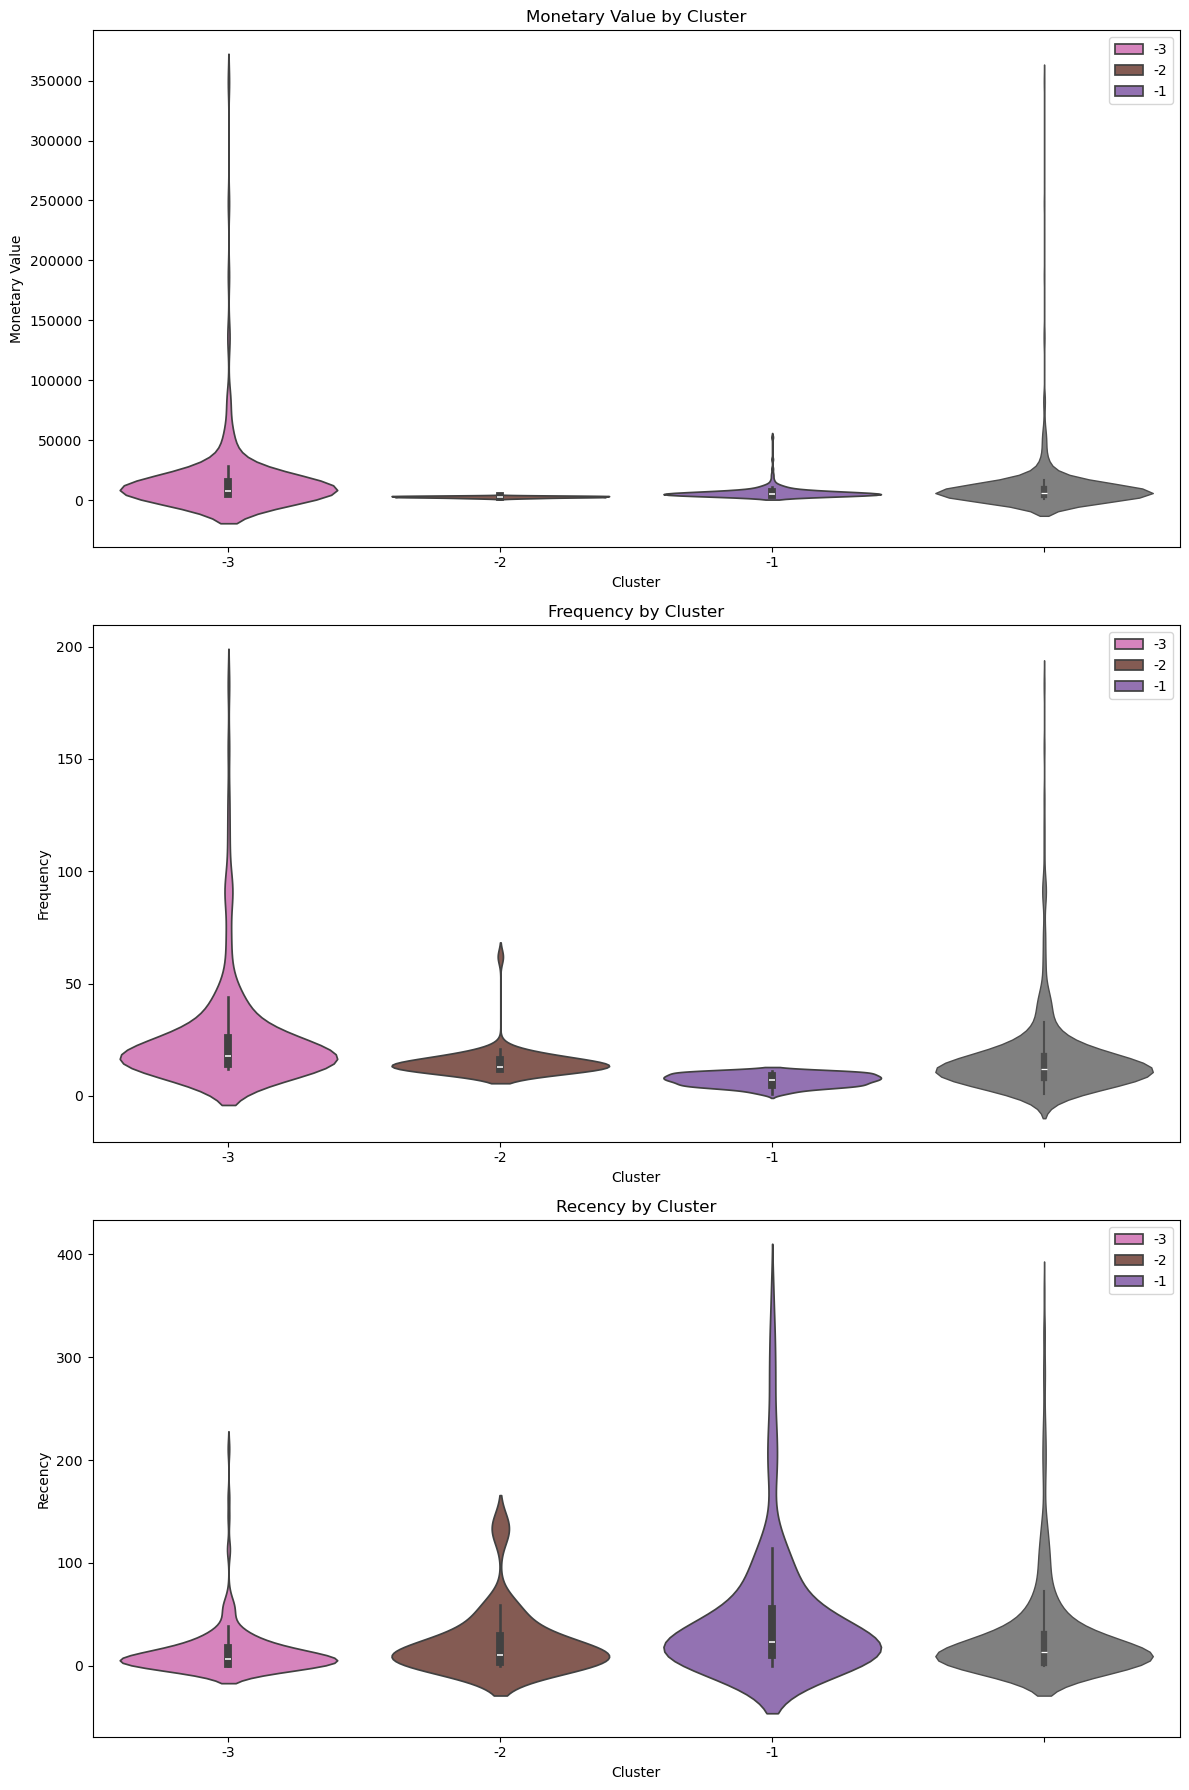

In [62]:
cluster_colors = {-1:'#9467bd',
                  -2:'#8c564b',
                  -3:'#e377c2'}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue = outlier_clusters_df['Cluster'] )
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

<p style='font-size:18px;'><i>Cluster -1 (Monetary Outliers) PAMPER:</i></p>
<ul style='font-size:18px;'><i>
<li> Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.</li>
<li>Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.</li></i></ul>

<p style='font-size:18px;'><i>Cluster -2 (Frequency Outliers) UPSELL:</i></p>
<ul style='font-size:18px;'><i>
<li>Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.</li>
<li>Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.</li>
</i></ul>
<p style='font-size:18px;'><i>Cluster -3 (Monetary & Frequency Outliers) DELIGHT:</i></P>
<ul style='font-size:18px;'><i>
<li>Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.</li>
<li>Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.</li></i></ul>

In [63]:
# Mapping each cluster label to their descriptive name
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
    }

# Adding the ouliers clusters along with the other non-outliers clusters to our dataframe
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

In [64]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [65]:
# Map cluster numbers to their descriptive labels using the cluster_labels dictionary
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

In [66]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


##  *Visualization*

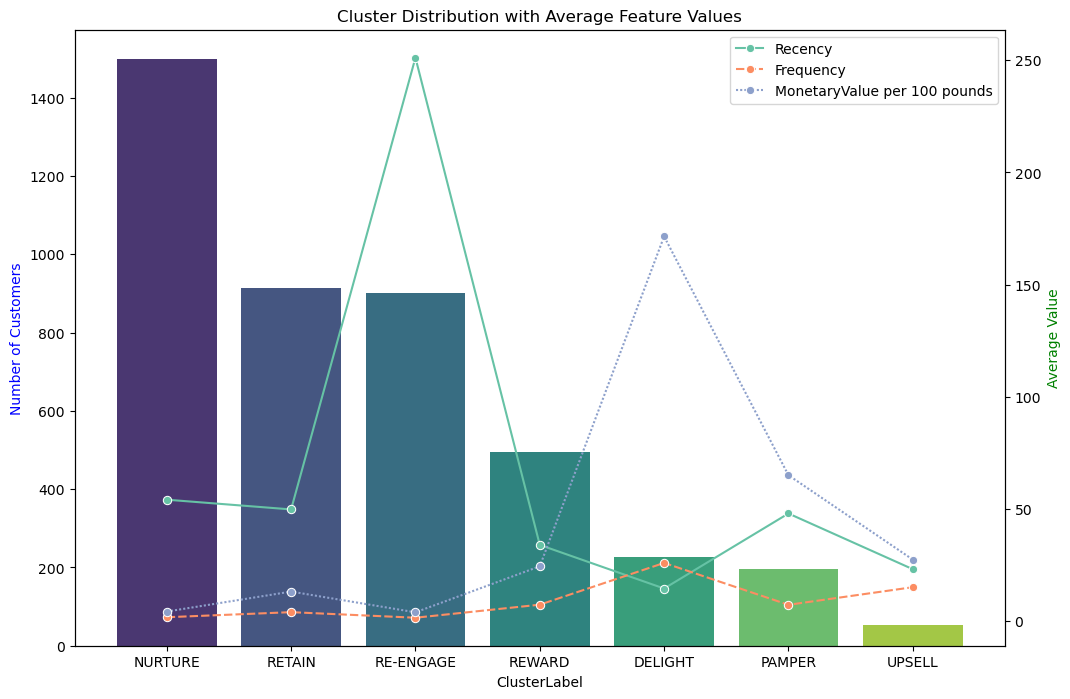

In [67]:
# Count the number of customers in each cluster
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
# Create a new column for monetary value in hundreds of pounds for better readability
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
# Calculate the mean values of RFM features for each cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a bar plot showing the number of customers in each cluster
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Create a second y-axis for the line plots
ax2 = ax1.twinx()

# Add line plots showing the average feature values for each cluster
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()